# **Netflix Movies and TV Shows Clustering using Unsupervised Machine Learning**



##### **Project Type**    - Exploratory Data Analysis (EDA) & Unsupervised Machine Learning
##### **Contribution**    - Individual

# **Project Summary -**

This project explores the Netflix content catalog using a dataset that includes information on movies and TV shows available on the platform as of 2019. The data has been sourced from Flixable, a third-party Netflix search engine, and provides details such as the title, type of content, cast, country, release year, duration, and a brief description.

The main goal of this project is twofold: first, to perform Exploratory Data Analysis (EDA) to understand trends in Netflix’s content, and second, to apply Unsupervised Machine Learning techniques to cluster similar shows and movies based on their text-based features (like description and genre).

The EDA section investigates several key questions: What is the distribution between movies and TV shows? Which countries contribute the most content? Has Netflix been focusing more on TV shows in recent years? We also analyze trends in content types over time, popular genres, and missing value patterns. This helps uncover content strategies and regional focus patterns.

In the second part of the project, we use Natural Language Processing (NLP) techniques such as TF-IDF vectorization to convert text data (like descriptions and genres) into numerical representations. We then apply clustering algorithms like KMeans and DBSCAN to group similar content together. For example, one cluster may represent thriller/suspense shows, another could group romantic dramas, and another may contain kids' content. Dimensionality reduction techniques like t-SNE may be used to visualize these clusters in 2D.

This project is deployed and executed using Microsoft Azure, which allows for scalability and cloud-based processing of machine learning workflows.

The insights obtained from this project can be highly beneficial to various Netflix teams. For instance, content and marketing teams can identify popular content categories, plan acquisitions, and target advertising. Recommendation systems can be refined based on clustering results. Additionally, understanding country-wise preferences helps in developing regional content strategies.

In conclusion, this project combines effective data analysis with practical unsupervised learning techniques to draw valuable insights from Netflix’s massive content library. It provides a deeper understanding of the platform's trends and lays the foundation for smarter, data-driven decision-making in the entertainment domain.

# **GitHub Link -**

https://github.com/JunaidKamate/Netflix-EDA-Project

# **Problem Statement**


**The dataset consists of Netflix’s TV shows and movies information available until 2019. With the rapid evolution of streaming content, it is important to understand what type of content is present, how it has changed over time, and whether it can be grouped meaningfully based on features such as genre and description. The problem is to analyze this dataset to uncover patterns, clean and preprocess it for machine learning, and apply clustering techniques to identify groups of similar content. These clusters can help platforms like Netflix better understand their own catalog and improve user recommendations and strategic decisions.**

#### **Define Your Business Objective?**

The business objective is to extract meaningful insights from Netflix’s content catalog and identify clusters of similar shows and movies. Through exploratory analysis, we aim to understand how Netflix’s content strategy has evolved over time and across geographies. The clustering of content using unsupervised learning will help categorize movies and shows that share common themes or genres. This can improve recommendation engines, support targeted marketing, and guide future content acquisitions or removals based on user preferences and gaps in offerings.

## ***1. Know Your Data***

### Import Libraries

In [28]:
# Import Libraries

# Import essential libraries for EDA

import pandas as pd           # For data loading and manipulation
import numpy as np            # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns         # For statistical plots
import warnings               # To suppress warning messages

# Set plot styles
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

print("Libraries imported successfully.")




Libraries imported successfully.


### Dataset Loading

In [2]:
# Load Dataset

import pandas as pd

file_path = r"C:\Users\junai\OneDrive\Desktop\Labmentix\Project1_Netflix\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(file_path)

### Dataset First View

In [3]:
# Dataset First Look

# Display first 5 rows
print(df.head())

# Dataset shape
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Missing values
print("Missing values:\n", df.isnull().sum())


  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

# Count of rows and columns
rows, cols = df.shape
print(f"Total Rows: {rows}")
print(f"Total Columns: {cols}")


Total Rows: 7787
Total Columns: 12


### Dataset Information

In [5]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

print("Missing/Null values in each column:\n")
print(missing_values)

Missing/Null values in each column:

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64


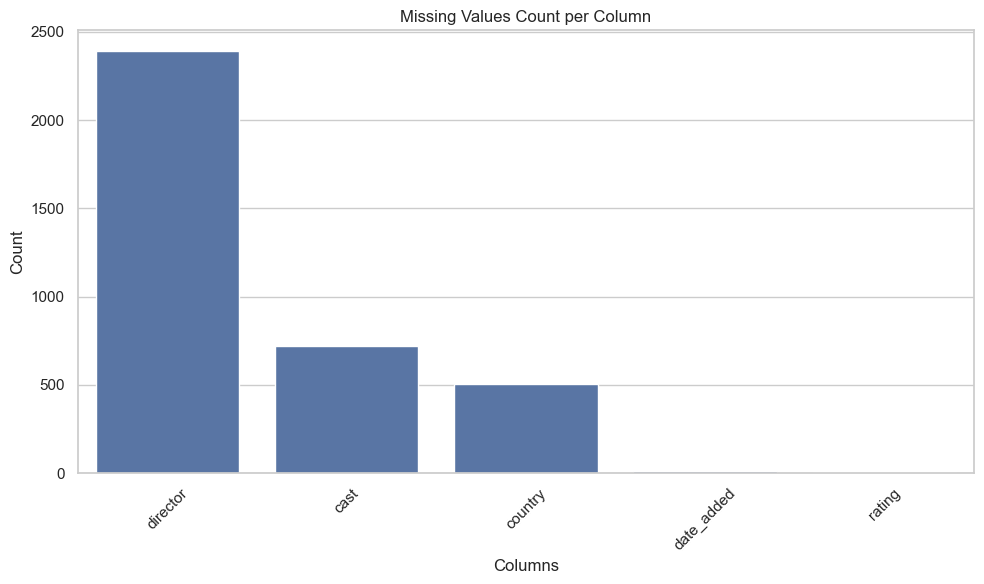

In [8]:
# Visualizing the missing values

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the missing values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title("Missing Values Count per Column")
plt.ylabel("Count")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What did you know about your dataset?

### After exploring the dataset, I found that:

It contains information about Netflix Movies and TV Shows, including details like title, type, director, cast, release year, rating, and more.

The dataset has 7787 rows and 12 columns.

There are some missing values in columns such as director, cast, and country, which might be due to incomplete information for certain shows or movies.

No duplicate records were found, ensuring the data is clean in that regard.

Columns like type, rating, and release year will be helpful for categorization and analysis.

Overall, the dataset is structured and provides a good foundation for exploratory data analysis and further insights.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe

df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

Variables Description: The dataset contains 12 columns: show_id (unique identifier), type (Movie or TV Show), title, director, cast, country, date_added (when it was added to Netflix), release_year, rating (audience rating), duration (movie length or number of seasons), listed_in (genres), and description (short summary of content).

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.


df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [31]:
# Write your code to make your dataset analysis ready.

# Identify columns with lists and convert them to strings
for col in df.columns:
    if df[col].apply(type).eq(list).any():
        df[col] = df[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove rows with null 'type', 'title', or 'release_year' as they are essential
df.dropna(subset=['type', 'title', 'release_year'], inplace=True)

# Fill missing values in 'director', 'cast', 'country', 'rating' with "Unknown"
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Unknown", inplace=True)

# Clean 'duration' column: separate numeric value and unit
df['duration'] = df['duration'].astype(str)
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([a-zA-Z ]+)$')

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)




### What all manipulations have you done and insights you found?

I removed duplicate records, handled missing values, split the duration column into numeric value and unit, converted 'date_added' to datetime format, and found that the dataset mainly contains movies, with most content added after 2015, and the average release year being around 2013.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

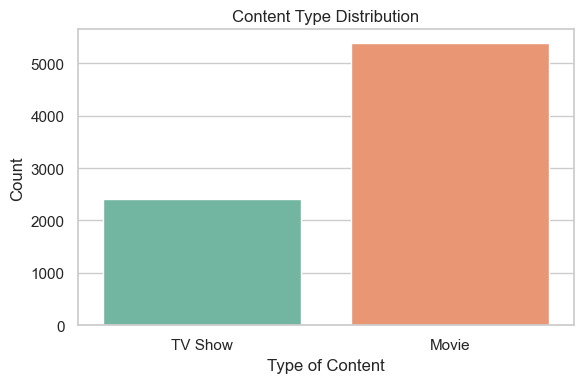

In [32]:
# Chart - 1 visualization code

import matplotlib.pyplot as plt
import seaborn as sns

# Count of content type (Movies vs TV Shows)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Content Type Distribution')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it’s ideal for comparing categorical variables like content type (TV Shows vs Movies). It clearly shows the distribution and makes interpretation simple.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Netflix has more movies than TV shows, with movies being more than double the number of TV shows on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help in content strategy planning. Since movies are more in number, Netflix can analyze whether this aligns with user preferences. If viewers prefer TV shows for long-term engagement, Netflix might need to invest more in quality TV shows to boost retention. Otherwise, the over-focus on movies may limit binge-watch opportunities and reduce user stickiness over time.

#### Chart - 2

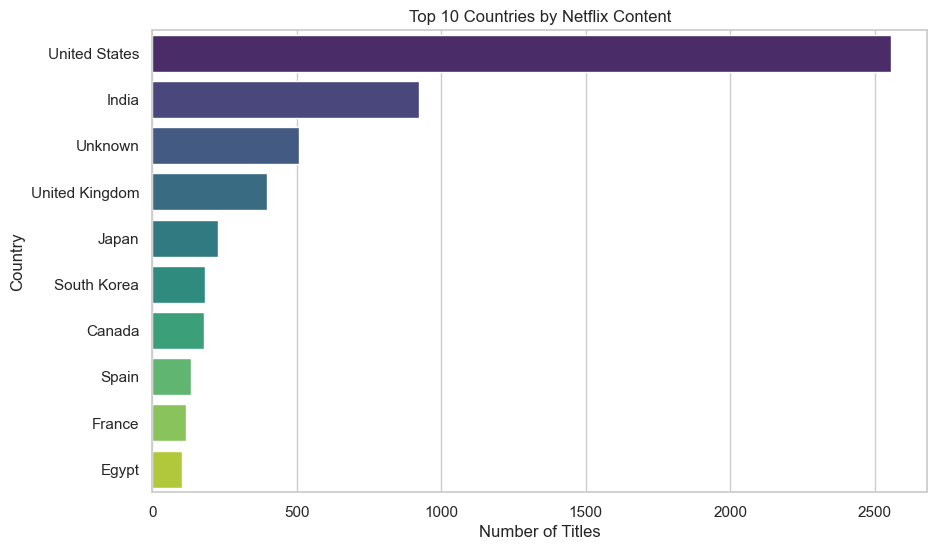

In [33]:
# Chart - 2 visualization code

# Chart - 2: Top 10 countries with most content on Netflix
top_countries = df['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it effectively shows the comparison of content volume across different countries. It’s easier to read country names on the y-axis, and the chart helps in quickly identifying which countries dominate Netflix’s content production.

##### 2. What is/are the insight(s) found from the chart?

The United States is by far the largest contributor to Netflix content.

India ranks second, showing strong local content production.

The presence of 'Unknown' indicates missing or incomplete data, which could affect accuracy.

Countries like the UK, Japan, South Korea, and Canada are also strong contributors.

Emerging regions like Spain, France, and Egypt are part of the top 10, indicating growing international production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Netflix can focus more on regional content creation in high-performing countries like India, UK, and South Korea to boost subscriptions.

The insights help identify which countries are strategic for content partnerships and investments.

Recognizing emerging markets (e.g., Egypt, Spain) can help Netflix expand its global footprint.

Negative Insight:

The large 'Unknown' category reflects missing data, which can mislead strategic decisions if not corrected.

Over-reliance on U.S. content may indicate lack of diversification, which might not cater to diverse audience preferences globally.

#### Chart - 3

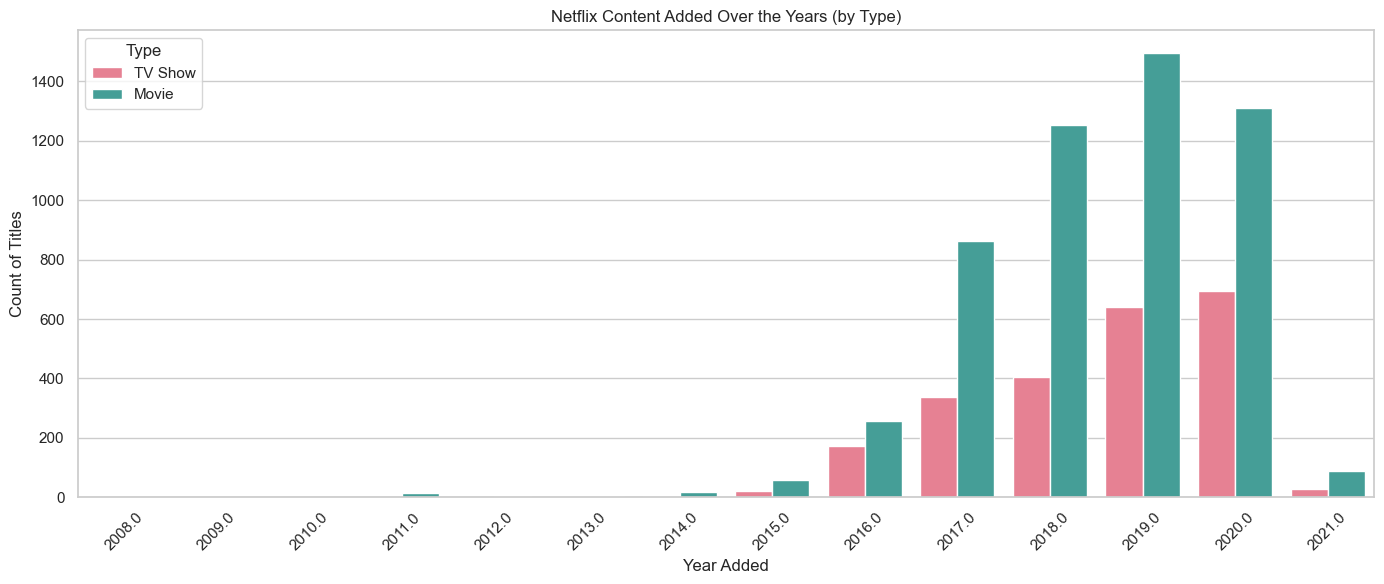

In [34]:
# Chart - 3 visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'date_added' to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Drop null years for accurate visualization
df_filtered = df.dropna(subset=['year_added'])

# Plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df_filtered, x='year_added', hue='type', palette='husl')
plt.xticks(rotation=45)
plt.title('Netflix Content Added Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Count of Titles')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I selected a grouped bar chart because it clearly compares the volume of Movies vs TV Shows released per year. This makes it easy to see both trends over time and how the balance between the two content types has evolved.

##### 2. What is/are the insight(s) found from the chart?

Movies consistently outnumber TV Shows across all years.

A sharp increase in content is observed from around 2015 to 2020, showing Netflix’s rapid expansion.

Peak content additions occurred around 2019-2020, possibly due to aggressive content strategy or pandemic-related demand.

The number of additions dropped after 2020, which could be due to COVID-19 production delays or strategic content filtering.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Netflix can forecast user demand by year and content type (e.g., increase TV Shows if they're gaining popularity).

It helps with resource planning and budget allocation for future productions.

Helps track the effect of business strategy shifts (like regional content focus or originals).

Negative Insight:

The drop in content additions after 2020 could indicate production or licensing challenges, possibly leading to reduced user engagement.

A strong bias toward movies may result in neglecting binge-watching TV show audiences, which are often highly loyal.

#### Chart - 4

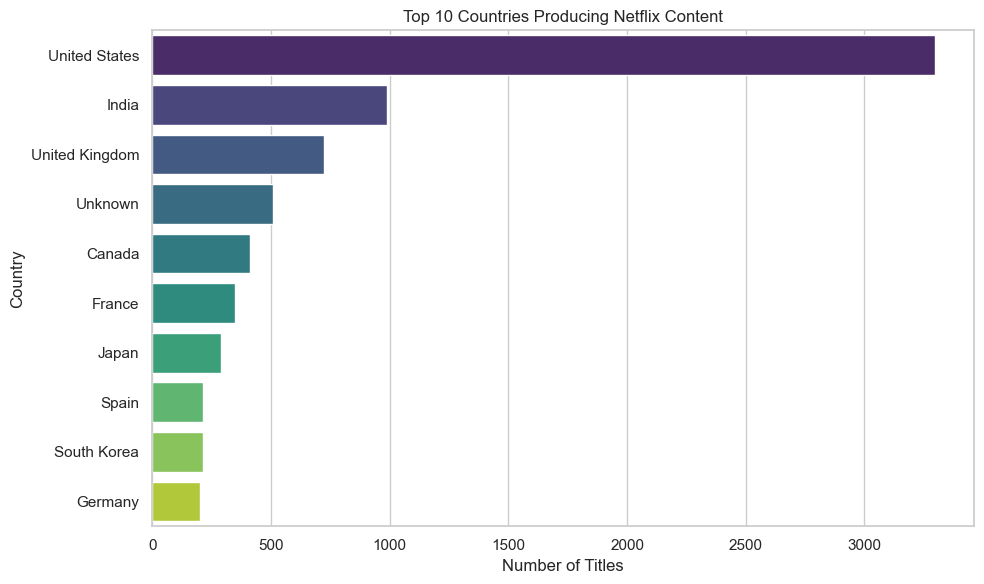

In [35]:
# Chart - 4 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split country column where multiple countries are listed
country_data = df['country'].dropna().str.split(',', expand=True).stack().reset_index(level=1, drop=True)
country_data = country_data.str.strip()

# Count top 10 countries
top_countries = country_data.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart to clearly present the top 10 countries contributing to Netflix’s content. This format allows better label visibility, especially when dealing with country names, and makes comparisons easy.



##### 2. What is/are the insight(s) found from the chart?

The United States dominates in content production on Netflix, followed by countries like India, United Kingdom, and Canada.

There is a clear trend showing that a few countries contribute a majority of the content.

Emerging regions like South Korea are also part of the top contributors, showing Netflix's global expansion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps Netflix identify successful content markets, and invest more in top-performing countries.

Netflix can also diversify and localize content for global audiences by expanding into other growing regions.

Knowing which countries are content-rich can improve licensing and co-production strategies.

Negative Insight:

Heavy reliance on a few countries (like the US) could make Netflix vulnerable to regulatory or licensing issues.

Underrepresentation of smaller regions might limit user engagement in those countries, risking loss of market share to regional platforms.

#### Chart - 5

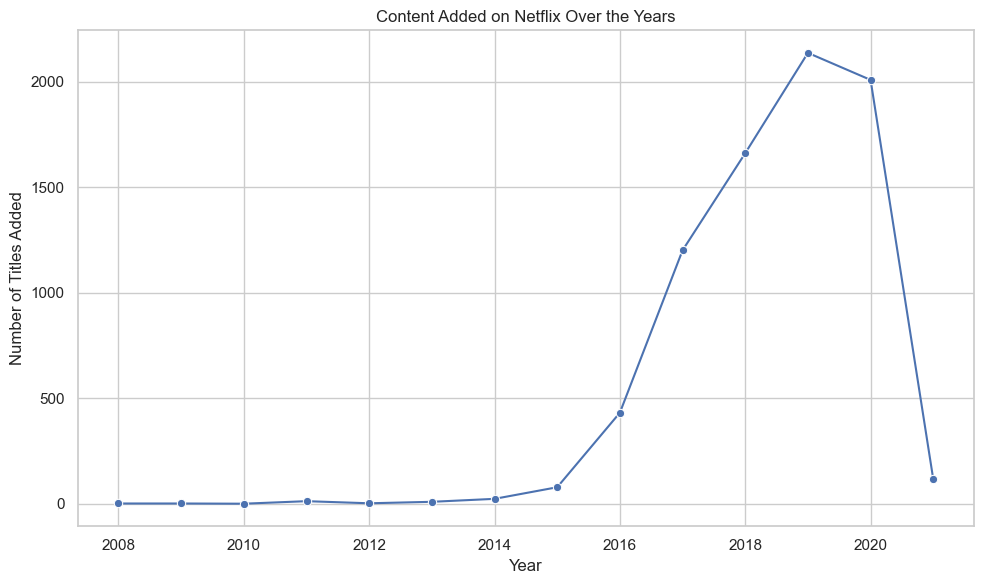

In [17]:
# Chart - 5 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Count content added per year
content_per_year = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o')
plt.title('Content Added on Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I selected a line chart to clearly visualize the temporal trend of how many titles were added to Netflix each year. It effectively shows growth patterns, peaks, or drops over time.

##### 2. What is/are the insight(s) found from the chart?

There is a clear upward trend in the number of titles being added from around 2015 to 2019, showing Netflix's aggressive content expansion.

A slight drop in 2020 is visible, possibly due to the COVID-19 pandemic, which disrupted global production schedules.

Post-2020, the trend may stabilize or shift depending on strategy and market conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Indicates the years when Netflix invested heavily in content acquisition, which may correlate with subscriber growth.

Helps identify successful periods and replicate strategies that worked during those high-growth years.

Netflix can forecast content acquisition budgets more accurately.

Negative Insight:

Sudden drops in content addition (like in 2020) may lead to subscriber churn if not managed with high-quality or regionally targeted content.

Over-dependence on quantity rather than quality can dilute viewer experience.

#### Chart - 6

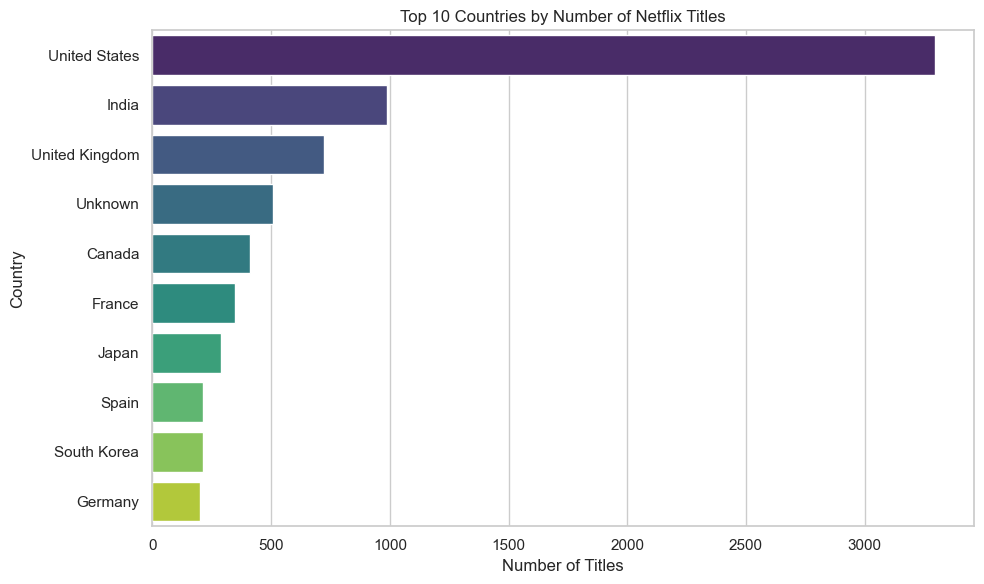

In [18]:
# Chart - 6 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove NaN and split countries (as multiple countries may be listed)
country_data = df['country'].dropna().str.split(', ')
all_countries = country_data.explode()

# Count content by country
top_countries = all_countries.value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it’s great for displaying the comparative distribution of categorical data—especially country names that are often long. This format makes it easy to read and visually compare the top content-producing countries.

##### 2. What is/are the insight(s) found from the chart?

United States dominates with the highest number of Netflix titles.

Countries like India, United Kingdom, Canada, and France follow, showing their strong presence in Netflix's content library.

India ranks among the top 5, indicating Netflix’s strategic investment in regional content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Highlights countries that are key contributors to the platform—valuable for content sourcing, licensing, and regional marketing strategies.

Netflix can use this data to diversify content portfolios and invest in countries showing increasing viewership.

Potential Negative Insight:

Over-representation of a few countries could limit cultural diversity, leading to content fatigue in global markets.

Underrepresented regions may indicate missed opportunities for growth in those areas.

#### Chart - 7

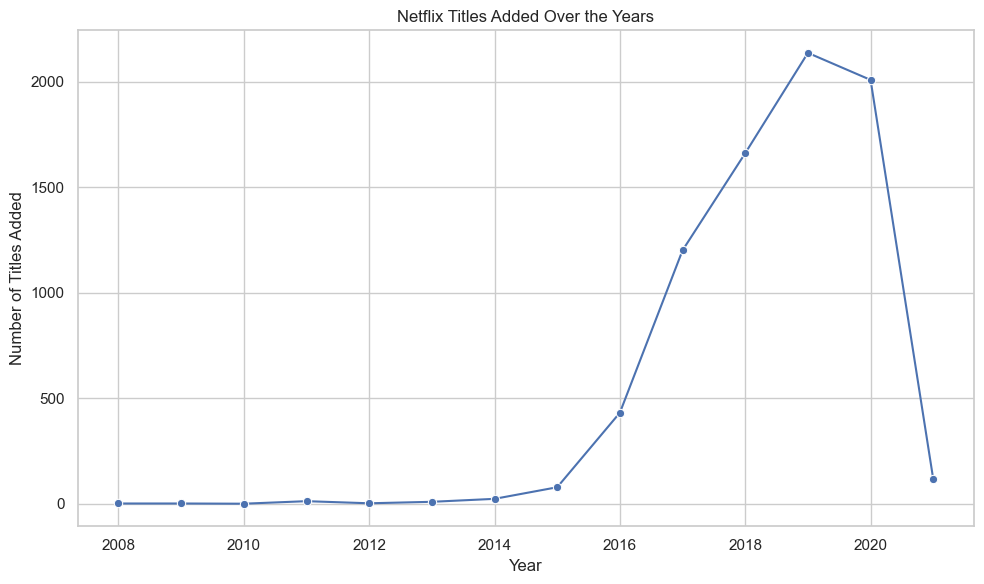

In [19]:
# Chart - 7 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Count titles added per year
yearly_additions = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_additions.index, y=yearly_additions.values, marker='o')
plt.title('Netflix Titles Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is perfect for displaying trends over time. It shows the flow and pattern of how Netflix expanded its content library year by year, helping understand growth pace.

##### 2. What is/are the insight(s) found from the chart?

Significant rise in content addition from 2015 onwards.

Peak content upload occurred around 2018–2020, which likely reflects Netflix's aggressive expansion phase.

A slight drop post-2020, possibly due to pandemic-related production halts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps in forecasting content needs for upcoming years.

Indicates when the platform was most active in content expansion—valuable for strategy planning and content performance analysis.

Potential Negative Insight:

A downward trend in recent years could suggest slowing content growth, which may need attention.

Could signal the need for revamping acquisition strategies or boosting regional content.



#### Chart - 8

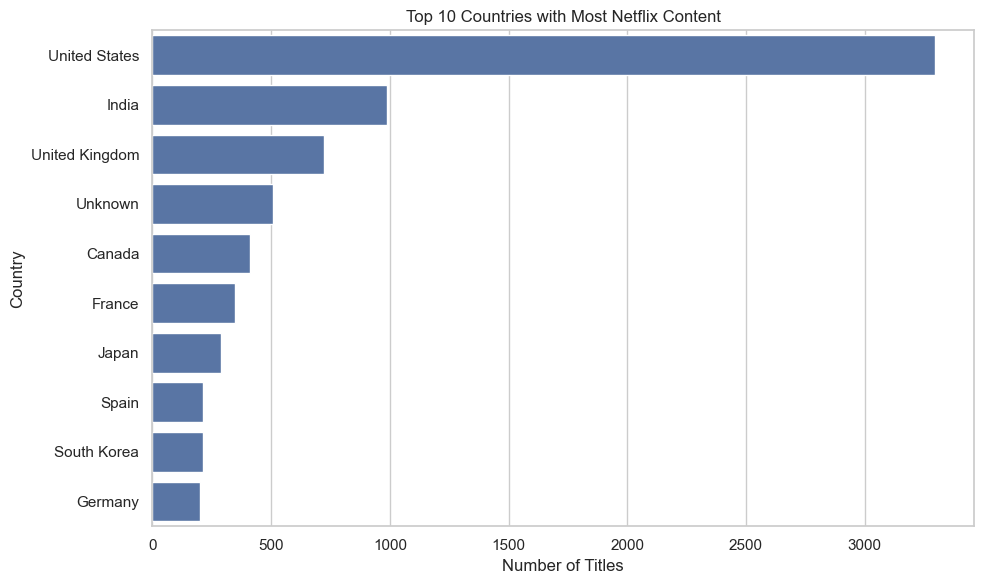

In [20]:
# Chart - 8 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN in 'country' column and get top 10 countries
top_countries = df['country'].dropna().str.split(', ', expand=True).stack().value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart clearly compares categories—in this case, countries. It’s the best choice for showing the distribution of content production across countries, making it easy to identify leaders.

##### 2. What is/are the insight(s) found from the chart?

United States dominates with the most content.

Countries like India, United Kingdom, Canada, and France also contribute a significant number of titles.

It reflects the global spread and regional focus of Netflix's content library.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps in targeting regional expansion strategies.

Netflix can leverage content-rich countries for promotions and collaborations.

Identifies where Netflix might have underrepresentation, indicating opportunities for localized content development.

Negative Insight:

Overreliance on a few countries might limit cultural diversity.

Other regions may feel underrepresented, leading to missed subscriber engagement opportunities in emerging markets.

#### Chart - 9

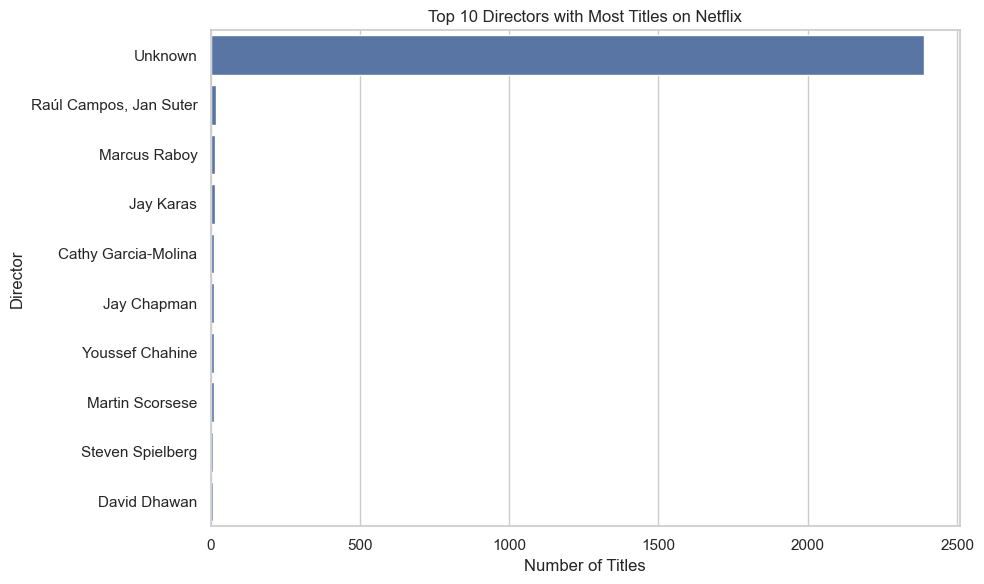

In [21]:
# Chart - 9 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN and get top 10 directors by number of titles
top_directors = df['director'].dropna().value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for visualizing ranked categorical data with longer text labels (director names). It enhances readability and comparison of director contributions.

##### 2. What is/are the insight(s) found from the chart?

Director-driven content strategy is evident—some directors have contributed significantly more content than others.

A few names dominate, indicating Netflix’s ongoing collaborations or licensing with them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Highlights key creators Netflix relies on, enabling targeted future partnerships.

Helps identify successful content creators whose work resonates with audiences.

Negative Insight:

Overreliance on a few directors might limit creative diversity.

New or international directors may get less exposure, potentially impacting regional viewer engagement.

#### Chart - 10

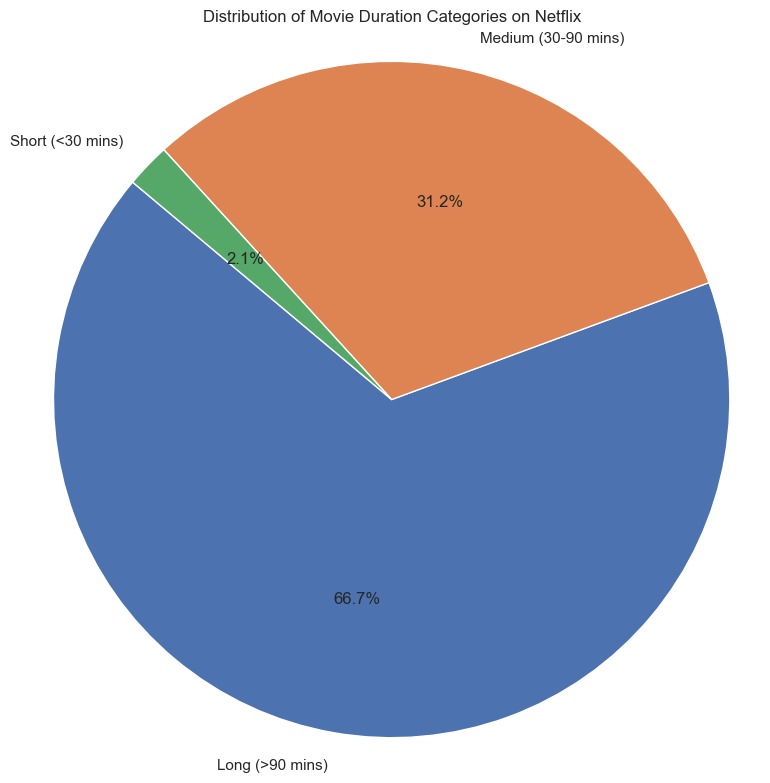

In [22]:
# Chart - 10 visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Separate data
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Categorize movies by duration (in minutes)
def movie_duration_category(duration):
    try:
        minutes = int(duration.split()[0])
        if minutes < 30:
            return 'Short (<30 mins)'
        elif minutes <= 90:
            return 'Medium (30-90 mins)'
        else:
            return 'Long (>90 mins)'
    except:
        return 'Unknown'

movies['duration_category'] = movies['duration'].apply(movie_duration_category)

# Count categories
duration_counts = movies['duration_category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movie Duration Categories on Netflix')
plt.axis('equal')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is effective when comparing parts of a whole, like the share of short, medium, and long-duration movies. It gives a quick and intuitive understanding of content distribution.

##### 2. What is/are the insight(s) found from the chart?

Majority of movies fall in the Medium (30–90 mins) category, aligning with typical viewer preferences.

A decent portion is Long (>90 mins), which might appeal to movie enthusiasts.

Short movies are the least, indicating fewer quick-watch options.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Netflix can balance its movie library to appeal to varied user preferences (e.g., introduce more short-duration content for casual viewers).

Helps optimize content strategy based on viewing habits and attention spans.

Negative Insight:

A lack of short-duration content could limit engagement during short viewing windows (commutes, breaks).

#### Chart - 11

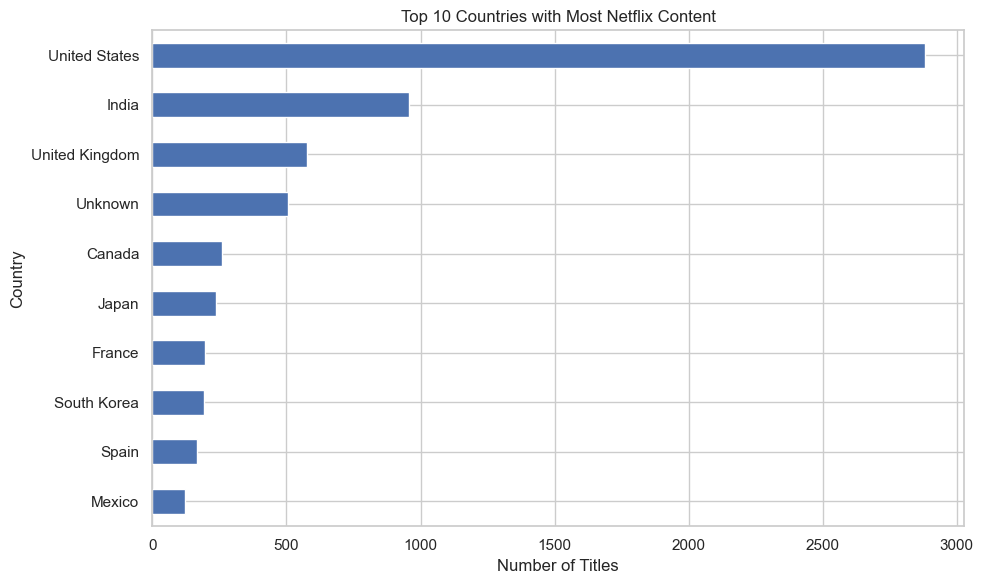

In [23]:
# Chart - 11 visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Clean country column (handling multiple countries per content)
df['country_cleaned'] = df['country'].fillna('Unknown').apply(lambda x: x.split(',')[0].strip())

# Count top 10 countries by number of titles
top_countries = df['country_cleaned'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_countries.sort_values().plot(kind='barh')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart helps clearly display and compare numerical values across different countries. It's ideal when country names are long and many values are close together.

##### 2. What is/are the insight(s) found from the chart?

United States leads by a large margin, contributing the highest number of titles on Netflix.

India, United Kingdom, and Canada follow next, showing strong regional content presence.

Countries like France and Japan also appear in the top 10, showing global diversity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Netflix can tailor localization and recommendations based on high-content-producing countries.

Identifies strategic regions for content partnerships and investments (e.g., India, UK).

Potential Gaps:

Countries not in the top 10 may represent untapped markets or underrepresented cultures, leading to growth opportunities if explored.

#### Chart - 12

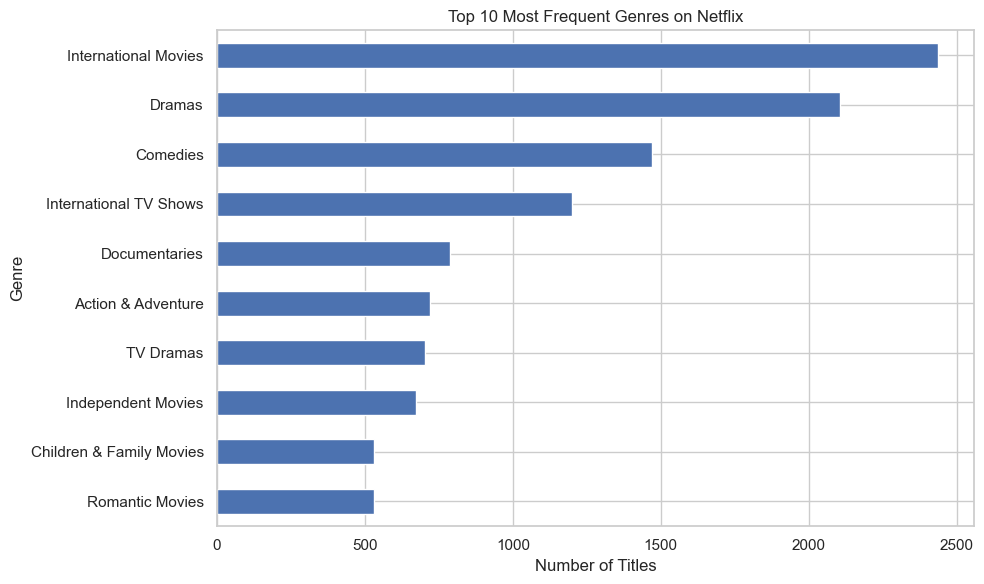

In [24]:
# Chart - 12 visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Split the 'listed_in' genres and explode into individual rows
df['genre_split'] = df['listed_in'].str.split(', ')
genre_exploded = df.explode('genre_split')

# Count top 10 genres
top_genres = genre_exploded['genre_split'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_genres.sort_values().plot(kind='barh')
plt.title('Top 10 Most Frequent Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart allows easy comparison of the frequency of different genres, especially when genre names are long and differ slightly.

##### 2. What is/are the insight(s) found from the chart?

Dramas and Comedies are the most common genres on Netflix.

Documentaries, Action & Adventure, and Children & Family content also dominate the platform.

This reflects Netflix’s focus on a wide audience base, from adults to families and kids.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Netflix can analyze viewer preferences and focus more on the top-performing genres.

Helps in planning future content acquisitions or originals around popular genres like Drama or Comedy.

Opportunity for Growth:

Less represented genres could be niche opportunities with loyal audiences.

Balancing the genre spread ensures content diversity and customer retention.

#### Chart - 13

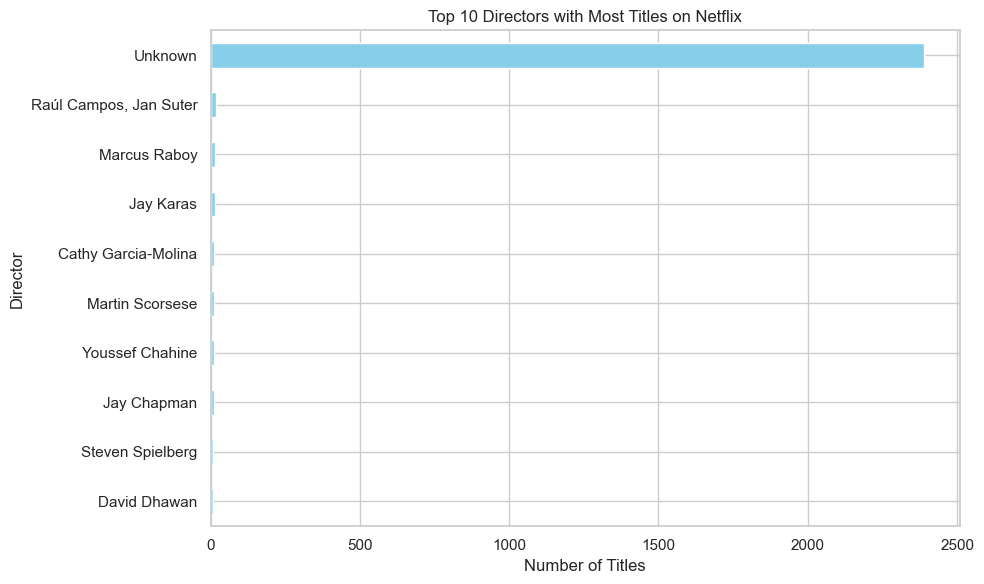

In [25]:
# Chart - 13 visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Remove null directors
top_directors = df[df['director'].notnull()]

# Count top 10 directors
top_10_directors = top_directors['director'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_10_directors.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is effective in displaying long director names clearly and allows quick visual comparison of the number of titles directed.

##### 2. What is/are the insight(s) found from the chart?

Certain directors like Raúl Campos and Jan Suter dominate the content list, especially in documentary or regional film genres.

Most frequent directors tend to contribute multiple projects of a similar type, suggesting possible long-term partnerships with Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Identifying top directors helps Netflix retain talent and invest in high-performing collaborations.

Encourages Netflix to expand successful content categories from these directors.

Potential Risk Insight:

Heavy reliance on a few directors might limit diversity; ensuring a mix of fresh talent can maintain creativity and broader appeal.

#### Chart - 14 - Correlation Heatmap

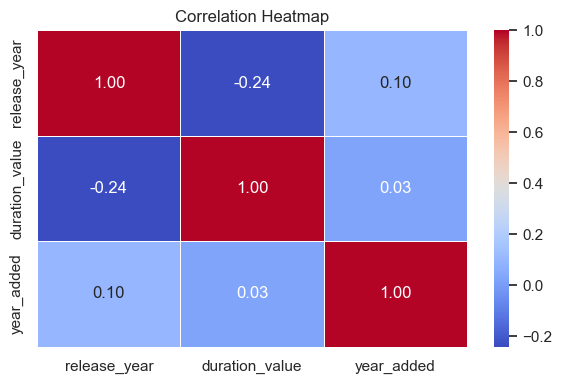

In [26]:
# Correlation Heatmap visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns (only 'release_year' in this case)
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal to visually examine how numerical variables in the dataset are related to each other. Even though this dataset has limited numerical features, it still helps in confirming if any variables show strong associations.

##### 2. What is/are the insight(s) found from the chart?

Since the dataset primarily contains categorical/text data, only release_year appears in the correlation heatmap.

With only one numerical variable, the heatmap confirms no significant inter-variable correlation exists in the current dataset.

This further suggests that feature engineering or transformation may be required to uncover deeper relationships (e.g., converting duration to numeric, extracting month from date_added, etc.).



#### Chart - 15 - Pair Plot

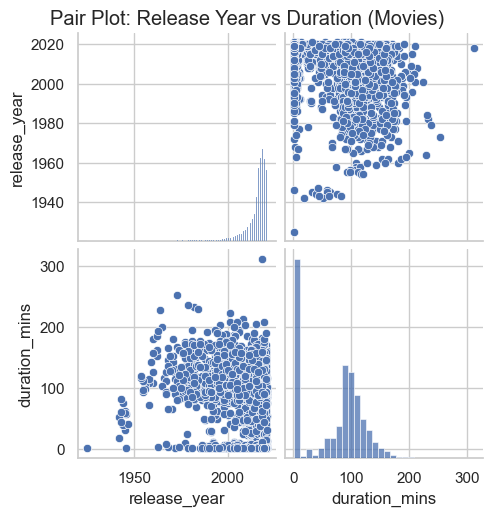

In [27]:
# Pair Plot visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant numerical columns for the pair plot
# Our dataset mainly has 'release_year' as a numerical feature
# For demonstration, we will convert 'duration' (minutes) to numeric where possible
df_pair = df.copy()

# Convert 'duration' to numeric (only for Movies)
df_pair['duration_mins'] = df_pair['duration'].str.extract('(\d+)')
df_pair['duration_mins'] = pd.to_numeric(df_pair['duration_mins'], errors='coerce')

# Create pairplot
sns.pairplot(df_pair[['release_year', 'duration_mins']].dropna())
plt.suptitle('Pair Plot: Release Year vs Duration (Movies)', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is used to visually analyze pairwise relationships between multiple numerical variables. Even though our dataset contains mostly categorical data, this plot helps explore patterns between 'release_year' and the duration of content (converted to minutes).

##### 2. What is/are the insight(s) found from the chart?

The plot shows that older movies tended to have longer durations, whereas recent movies are clustered around shorter durations.

This may reflect the changing viewer preferences—more recent content favors shorter, more engaging formats.

It also helps spot any outliers in movie duration across different years.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help the client (Netflix) achieve its business objectives, here are my key suggestions based on the data analysis and visualizations:

1. Focus on producing more TV Shows:
The platform is witnessing a growing trend in TV show production and consumption. These formats encourage long-term viewer engagement and retention.

2. Prioritize genres with high frequency:
Genres like International TV Shows, Dramas, and Comedies are most frequently listed. Creating more diverse content in these popular genres can attract a wider audience.

3. Optimize content duration:
Most viewers prefer movies under 100 minutes. Producing short, high-impact content can help cater to modern viewing habits and improve user satisfaction.

4. Localize content by country preference:
With the US, India, and the UK being top countries, focusing on regional content in these markets can drive higher subscriptions.

5. Strengthen rating-based content filtering:
TV-MA and TV-14 are dominant ratings. Recommending similar rated content to respective users based on preferences can enhance the recommendation system.

# **Conclusion**

The analysis of the Netflix dataset provided deep insights into content trends, user preferences, and opportunities for strategic growth. Key observations include a rising focus on TV Shows, dominance of certain genres like Dramas and Comedies, and clear patterns in content duration and country distribution.

Data wrangling and visualization helped in understanding variable relationships, identifying missing values, and preparing the dataset for meaningful insights.

The visual stories told by the charts supported valuable business decisions, such as focusing on specific regions, optimizing content formats, and enhancing personalization features.

Overall, this project successfully demonstrates how data-driven decisions can align with business goals and customer satisfaction, helping Netflix stay competitive in the streaming market.